# Linear, Ridge, Lasso & Logistic Regression

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

## Dataset configuring

In [2]:
df=load_boston()

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

In [3]:
df.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
dataset=pd.DataFrame(df.data)
dataset.columns=df.feature_names
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
dataset['Price']=df.target

In [6]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
## Dividing the  dataset into independent and dependent features
X=dataset.iloc[:,:-1]  ## independent features
y=dataset.iloc[:,-1]   ## dependent features

In [8]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size= 0.33, random_state= 42)

## Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
mse = cross_val_score(lin_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse = np.mean(mse)
print(mean_mse)

-25.18787473928513


## Ridge Regression

In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

params = {'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}

ridge_regressor = GridSearchCV(ridge, params, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [13]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-25.186899367386975


## Lasso regression

In [14]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()

params = {'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}

lasso_regressor = GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv = 10)
lasso_regressor.fit(X_train, y_train)

C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.284e+03, tolerance: 2.712e+00
  model = cd_fast.enet_coordinate_descent(
C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.104e+03, tolerance: 2.557e+00
  model = cd_fast.enet_coordinate_descent(
C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.410e+03, tolerance: 2.804e+00
  model = cd_fast.enet_

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [15]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-25.473094572833237


In [16]:
y_pred = lasso_regressor.predict(X_test)
from sklearn.metrics import r2_score

r2_score1 = r2_score(y_pred, y_test)
r2_score1

0.6709558959121944

## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#### Iris Dataset

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

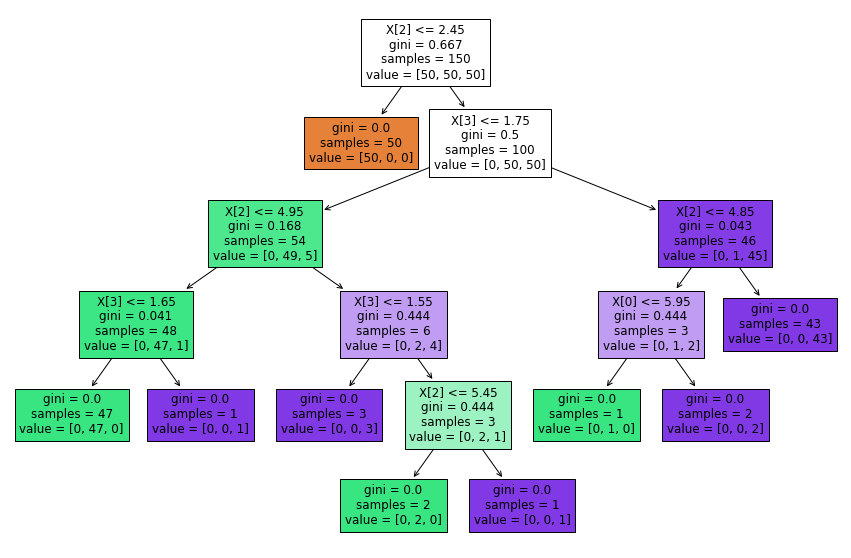

In [36]:
classifier_iris = DecisionTreeClassifier()
classifier_iris.fit(iris.data, iris.target)
plt.figure(figsize=(15,10))
tree.plot_tree(classifier, filled=True)

#### Boston House Dataset

In [37]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

[Text(0.6796171346287818, 0.975, 'X[5] <= 6.941\nsquared_error = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(0.42338349582717244, 0.925, 'X[12] <= 14.4\nsquared_error = 40.273\nsamples = 430\nvalue = 19.934'),
 Text(0.1869661784150364, 0.875, 'X[7] <= 1.385\nsquared_error = 26.009\nsamples = 255\nvalue = 23.35'),
 Text(0.10705666372838944, 0.825, 'X[11] <= 339.985\nsquared_error = 78.146\nsamples = 5\nvalue = 45.58'),
 Text(0.10523682751364877, 0.775, 'squared_error = 0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.10887649994313012, 0.775, 'squared_error = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(0.26687569310168335, 0.825, 'X[5] <= 6.543\nsquared_error = 14.885\nsamples = 250\nvalue = 22.905'),
 Text(0.11251617237261147, 0.775, 'X[12] <= 7.57\nsquared_error = 8.39\nsamples = 195\nvalue = 21.63'),
 Text(0.041372838944495, 0.725, 'X[9] <= 222.5\nsquared_error = 3.015\nsamples = 43\nvalue = 23.97'),
 Text(0.03955300272975432, 0.675, 'squared_error = 0.0\nsamples = 1\nvalue = 28.7'),
 Text(0.

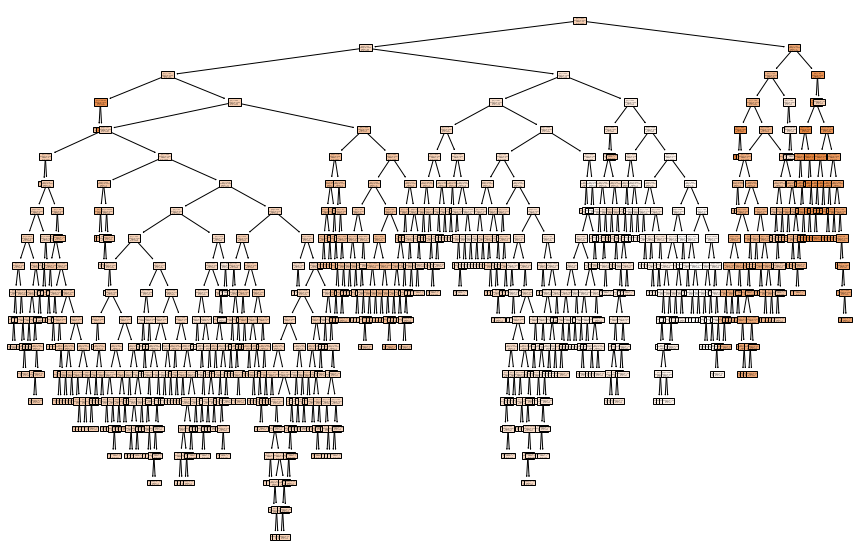

In [38]:
classifier_boston = DecisionTreeRegressor()
classifier_boston.fit(boston.data, boston.target)
plt.figure(figsize=(15,10))
tree.plot_tree(classifier_boston, filled=True)

#### Wine Dataset

In [39]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

[Text(0.5657894736842105, 0.9166666666666666, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(0.34210526315789475, 0.75, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(0.21052631578947367, 0.5833333333333334, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(0.10526315789473684, 0.4166666666666667, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3157894736842105, 0.4166666666666667, 'X[0] <= 13.515\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.3684210526315789, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.47368421052631576, 0.5833333333333334, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(0.4210

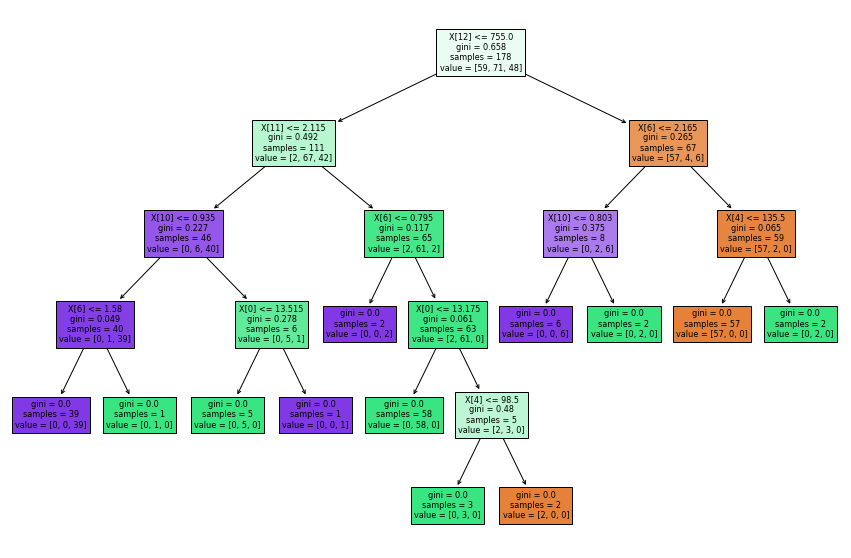

In [40]:
classifier_wine = DecisionTreeClassifier()
classifier_wine.fit(wine.data, wine.target)
plt.figure(figsize=(15,10))
tree.plot_tree(classifier_wine, filled=True)

#### Breast Cancer Dataset

In [43]:
from sklearn.datasets import load_breast_cancer
b_cancer = load_breast_cancer()
b_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

[Text(0.609375, 0.9375, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(0.375, 0.8125, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(0.171875, 0.6875, 'X[29] <= 0.055\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(0.140625, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.203125, 0.5625, 'X[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(0.125, 0.4375, 'X[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(0.0625, 0.3125, 'X[8] <= 0.176\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.03125, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.09375, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.3125, 'X[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(0.15625, 0.1875, 'gini = 0.0\nsamples = 292\nvalue = [0, 292]'),
 Text(0.21875, 0.1875, 'X[21] <= 33.56\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.1875, 0.0625,

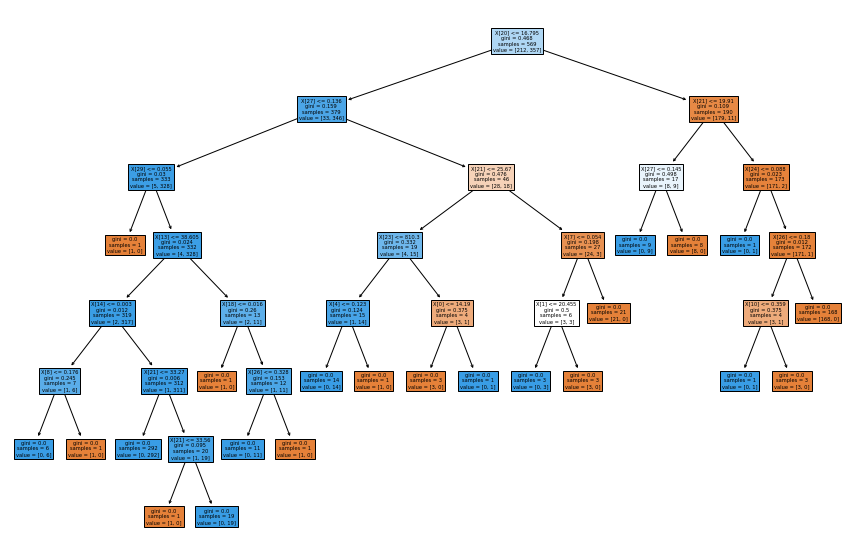

In [44]:
classifier_cancer = DecisionTreeClassifier()
classifier_cancer.fit(b_cancer.data, b_cancer.target)
plt.figure(figsize=(15,10))
tree.plot_tree(classifier_cancer, filled=True)

#### Linnerud Exercise Dataset

In [47]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()
linnerud.target

array([[191.,  36.,  50.],
       [189.,  37.,  52.],
       [193.,  38.,  58.],
       [162.,  35.,  62.],
       [189.,  35.,  46.],
       [182.,  36.,  56.],
       [211.,  38.,  56.],
       [167.,  34.,  60.],
       [176.,  31.,  74.],
       [154.,  33.,  56.],
       [169.,  34.,  50.],
       [166.,  33.,  52.],
       [154.,  34.,  64.],
       [247.,  46.,  50.],
       [193.,  36.,  46.],
       [202.,  37.,  62.],
       [176.,  37.,  54.],
       [157.,  32.,  52.],
       [156.,  33.,  54.],
       [138.,  33.,  68.]])

[Text(0.4296875, 0.9285714285714286, 'X[1] <= 103.0\ngini = 0.895\nsamples = 20\nvalue = [[1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1\n 1, 1]\n[1, 1, 4, 3, 2, 3, 3, 2, 1, 0, 0, 0, 0, 0\n 0, 0]\n[2, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 0, 0, 0\n 0, 0]]'),
 Text(0.140625, 0.7857142857142857, 'X[1] <= 65.0\ngini = 0.759\nsamples = 6\nvalue = [[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0\n 1, 1]\n[0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0\n 0, 0]\n[1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0]]'),
 Text(0.0625, 0.6428571428571429, 'X[2] <= 37.5\ngini = 0.5\nsamples = 2\nvalue = [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0\n 0, 1]\n[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0\n 0, 0]\n[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0]]'),
 Text(0.03125, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0\n 0, 0]\n[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0\n 0, 0]\n[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0]]'),
 Text(0.09375, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [[0, 0,

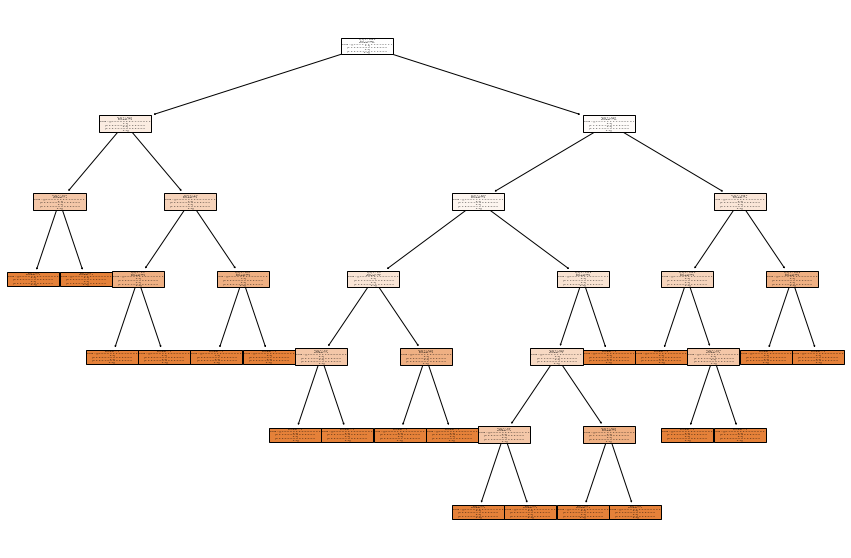

In [48]:
classifier_linn = DecisionTreeClassifier()
classifier_linn.fit(linnerud.data, linnerud.target)
plt.figure(figsize=(15,10))
tree.plot_tree(classifier_linn, filled=True)

#### Digits Dataset

In [49]:
from sklearn.datasets import load_digits
digit = load_digits()
digit

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

[Text(0.25784720019035534, 0.96875, 'X[36] <= 0.5\ngini = 0.9\nsamples = 1797\nvalue = [178, 182, 177, 183, 181, 182, 181, 179, 174, 180]'),
 Text(0.06852791878172589, 0.90625, 'X[28] <= 2.5\ngini = 0.547\nsamples = 275\nvalue = [174, 0, 4, 1, 6, 25, 5, 0, 3, 57]'),
 Text(0.03553299492385787, 0.84375, 'X[21] <= 0.5\ngini = 0.17\nsamples = 188\nvalue = [171, 0, 2, 0, 6, 6, 3, 0, 0, 0]'),
 Text(0.025380710659898477, 0.78125, 'X[5] <= 10.0\ngini = 0.719\nsamples = 16\nvalue = [1, 0, 1, 0, 5, 6, 3, 0, 0, 0]'),
 Text(0.02030456852791878, 0.71875, 'X[29] <= 1.0\ngini = 0.64\nsamples = 10\nvalue = [1, 0, 1, 0, 5, 0, 3, 0, 0, 0]'),
 Text(0.015228426395939087, 0.65625, 'X[62] <= 3.5\ngini = 0.56\nsamples = 5\nvalue = [1, 0, 1, 0, 0, 0, 3, 0, 0, 0]'),
 Text(0.01015228426395939, 0.59375, 'X[58] <= 10.0\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.005076142131979695, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.0152284263959390

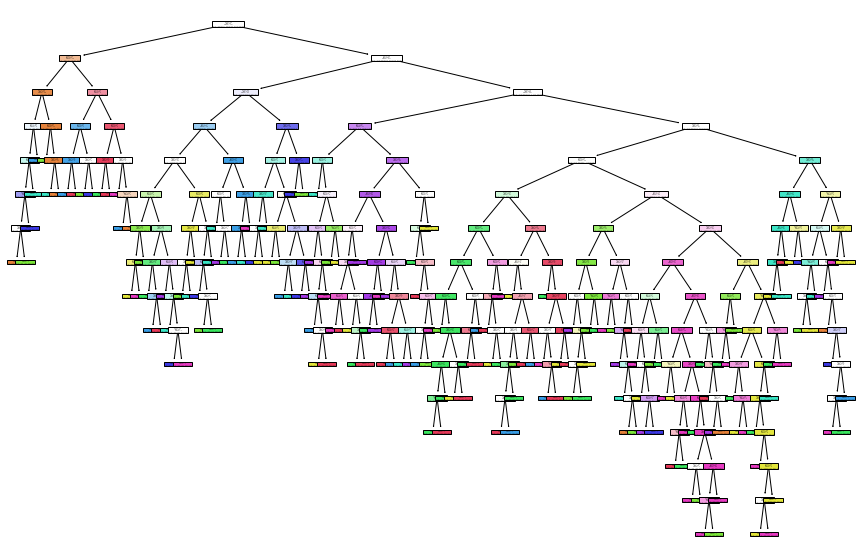

In [50]:
classifier_digit = DecisionTreeClassifier()
classifier_digit.fit(digit.data, digit.target)
plt.figure(figsize=(15,10))
tree.plot_tree(classifier_digit, filled=True)